In [123]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
import numpy as np    
from nltk.tokenize import word_tokenize 
import nltk

# download punctuation related NLTK functions
# (needed for sent_tokenize())
nltk.download('punkt')

nltk.download('averaged_perceptron_tagger')
# download wordnet
# (needed for lemmatization)
nltk.download('wordnet')
# download stopword lists
# (needed for stopword removal)
nltk.download('stopwords')
# dictionary of English words
nltk.download('words')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

import matplotlib.pyplot as plt
import urllib.request

!pip install wordcloud
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\reshm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\reshm\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\reshm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reshm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\reshm\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\reshm\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [124]:
df=pd.read_csv("K8 Reviews.csv")
df

,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...
...,...,...
14670,1,"I really like the phone, Everything is working..."
14671,1,The Lenovo K8 Note is awesome. It takes best p...
14672,1,Awesome Gaget.. @ this price
14673,1,This phone is nice processing will be successf...


In [125]:
df=df[['review']]

df

,review
0,Good but need updates and improvements
1,"Worst mobile i have bought ever, Battery is dr..."
2,when I will get my 10% cash back.... its alrea...
3,Good
4,The worst phone everThey have changed the last...
...,...
14670,"I really like the phone, Everything is working..."
14671,The Lenovo K8 Note is awesome. It takes best p...
14672,Awesome Gaget.. @ this price
14673,This phone is nice processing will be successf...


In [126]:
# converting to lowercase
df['review'] = df['review'].str.lower()

In [127]:
df[['review']]

,review
0,good but need updates and improvements
1,"worst mobile i have bought ever, battery is dr..."
2,when i will get my 10% cash back.... its alrea...
3,good
4,the worst phone everthey have changed the last...
...,...
14670,"i really like the phone, everything is working..."
14671,the lenovo k8 note is awesome. it takes best p...
14672,awesome gaget.. @ this price
14673,this phone is nice processing will be successf...


In [128]:

translator = str.maketrans('', '', string.punctuation)

# Apply translation to remove punctuation from each row in the 'review' column
df['review'] = df['review'].apply(lambda x: x.translate(translator))

In [129]:
df[['review']]

,review
0,good but need updates and improvements
1,worst mobile i have bought ever battery is dra...
2,when i will get my 10 cash back its already 15...
3,good
4,the worst phone everthey have changed the last...
...,...
14670,i really like the phone everything is working ...
14671,the lenovo k8 note is awesome it takes best pi...
14672,awesome gaget this price
14673,this phone is nice processing will be successf...


In [130]:

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

# Apply the function to the 'review' column
df['review'] = df['review'].apply(remove_stopwords)
df[['review']]

,review
0,good need updates improvements
1,worst mobile bought ever battery draining like...
2,get 10 cash back already 15 january
3,good
4,worst phone everthey changed last phone proble...
...,...
14670,really like phone everything working fine what...
14671,lenovo k8 note awesome takes best pictures dua...
14672,awesome gaget price
14673,phone nice processing successful dual camera s...


In [131]:
# Define a function to map POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default to noun if the tag is not recognized

# Function to perform lemmatization
def lemmatize_text(text):
    tokens = word_tokenize(text)  # Tokenize the text
    pos_tags = nltk.pos_tag(tokens)  # Perform POS tagging
    
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lemmatized_text = []
    for token, pos_tag in pos_tags:
        wordnet_pos = get_wordnet_pos(pos_tag)  # Map POS tag to WordNet POS
        lemmatized_token = lemmatizer.lemmatize(token, pos=wordnet_pos)  # Lemmatize the token
        lemmatized_text.append(lemmatized_token)
    
    return ' '.join(lemmatized_text)  # Join lemmatized tokens into a single string

# Apply lemmatization to the 'review' column
df['review'] = df['review'].apply(lemmatize_text)
df[['review']]

,review
0,good need update improvement
1,worst mobile buy ever battery drain like hell ...
2,get 10 cash back already 15 january
3,good
4,worst phone everthey change last phone problem...
...,...
14670,really like phone everything work fine whater ...
14671,lenovo k8 note awesome take best picture dual ...
14672,awesome gaget price
14673,phone nice processing successful dual camera s...


In [138]:
reviews = ' '.join(df['review'])
review_list = reviews.split()

In [139]:
frequencies = nltk.probability.FreqDist(review_list)


In [140]:
frequencies

FreqDist({'phone': 6781, 'good': 5842, 'battery': 3174, 'camera': 3144, 'mobile': 2398, 'product': 2168, 'lenovo': 2034, 'work': 1716, 'charge': 1653, 'use': 1650, ...})

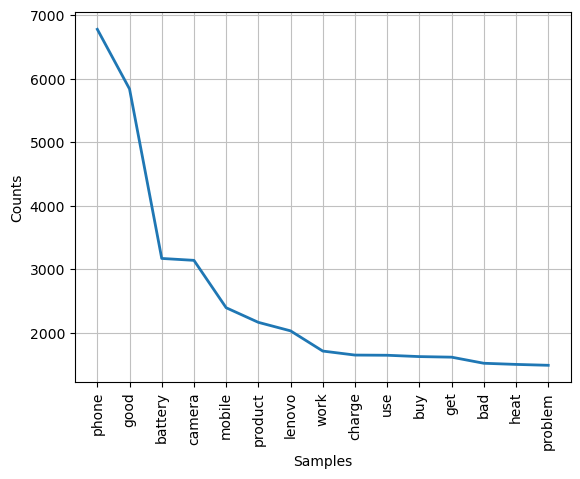

In [141]:
# Plot the frequencies
frequencies.plot(15,cumulative=False)
plt.show()

In [142]:
#@title Run this code first: Wordcloud function and loading the document (double-click to view) {display-mode: "form"}


# Draw a wordcloud!
# Inputs:
#   word_counts: a dictionary mapping strings to their counts
def draw_wordcloud(freq_dist, colormap):
    
    #TODO add a few corpus specific checks here to make sure people have done casing, lemmatization, punct removal
    uniq_count = len(freq_dist.keys())
    print("Building a word cloud with",uniq_count,"unique words...")
    wc = WordCloud(colormap=colormap, width=1500, 
                   height=1000).generate_from_frequencies(freq_dist)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    



Building a word cloud with 17722 unique words...


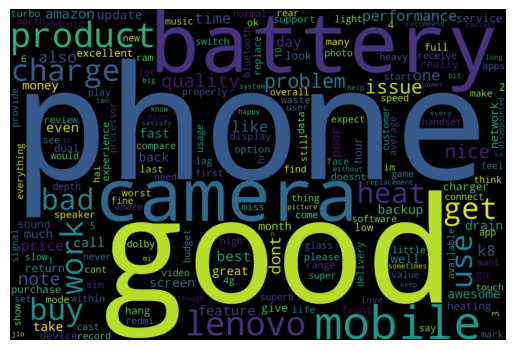

In [143]:
colormap = None
# Call the function to draw the word cloud
draw_wordcloud(frequencies, colormap)